In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("cleaned_google_playstore_data.csv")

In [14]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6,20


#### what are the Top 5 most installed Apps in Each popular Categories?

In [21]:
df_top5 = df.groupby(["Category", "App"])["Installs"].sum().reset_index()

In [22]:
df_top5

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9739,WEATHER,Yahoo Weather,10000000
9740,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9741,WEATHER,Yandex.Weather,10000000
9742,WEATHER,weather - weather forecast,1000000


In [31]:
df_top5 = df_top5.sort_values("Installs", ascending=False)

In [33]:
df_top5[df_top5["Category"] == "GAME"].iloc[:5]

,Category,App,Installs
4852,GAME,Subway Surfers,6000000000
4245,GAME,Candy Crush Saga,3000000000
4881,GAME,Temple Run 2,3000000000
4707,GAME,Pou,1500000000
4659,GAME,My Talking Tom,1000000000


In [38]:
df_top5[df_top5["Category"] == "PRODUCTIVITY"].iloc[:5]

,Category,App,Installs
7507,PRODUCTIVITY,Google Drive,4000000000
7505,PRODUCTIVITY,Google Calendar,1500000000
7444,PRODUCTIVITY,Dropbox,1500000000
7552,PRODUCTIVITY,Microsoft Word,1500000000
7414,PRODUCTIVITY,Cloud Print,500000000


In [39]:
df_top5[df_top5["Category"] == "FAMILY"].iloc[:5]

,Category,App,Installs
2698,FAMILY,Google Play Games,1000000000
2149,FAMILY,Candy Crush Saga,500000000
3005,FAMILY,My Talking Tom,500000000
3135,FAMILY,Pou,500000000
3183,FAMILY,ROBLOX,400000000


In [37]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

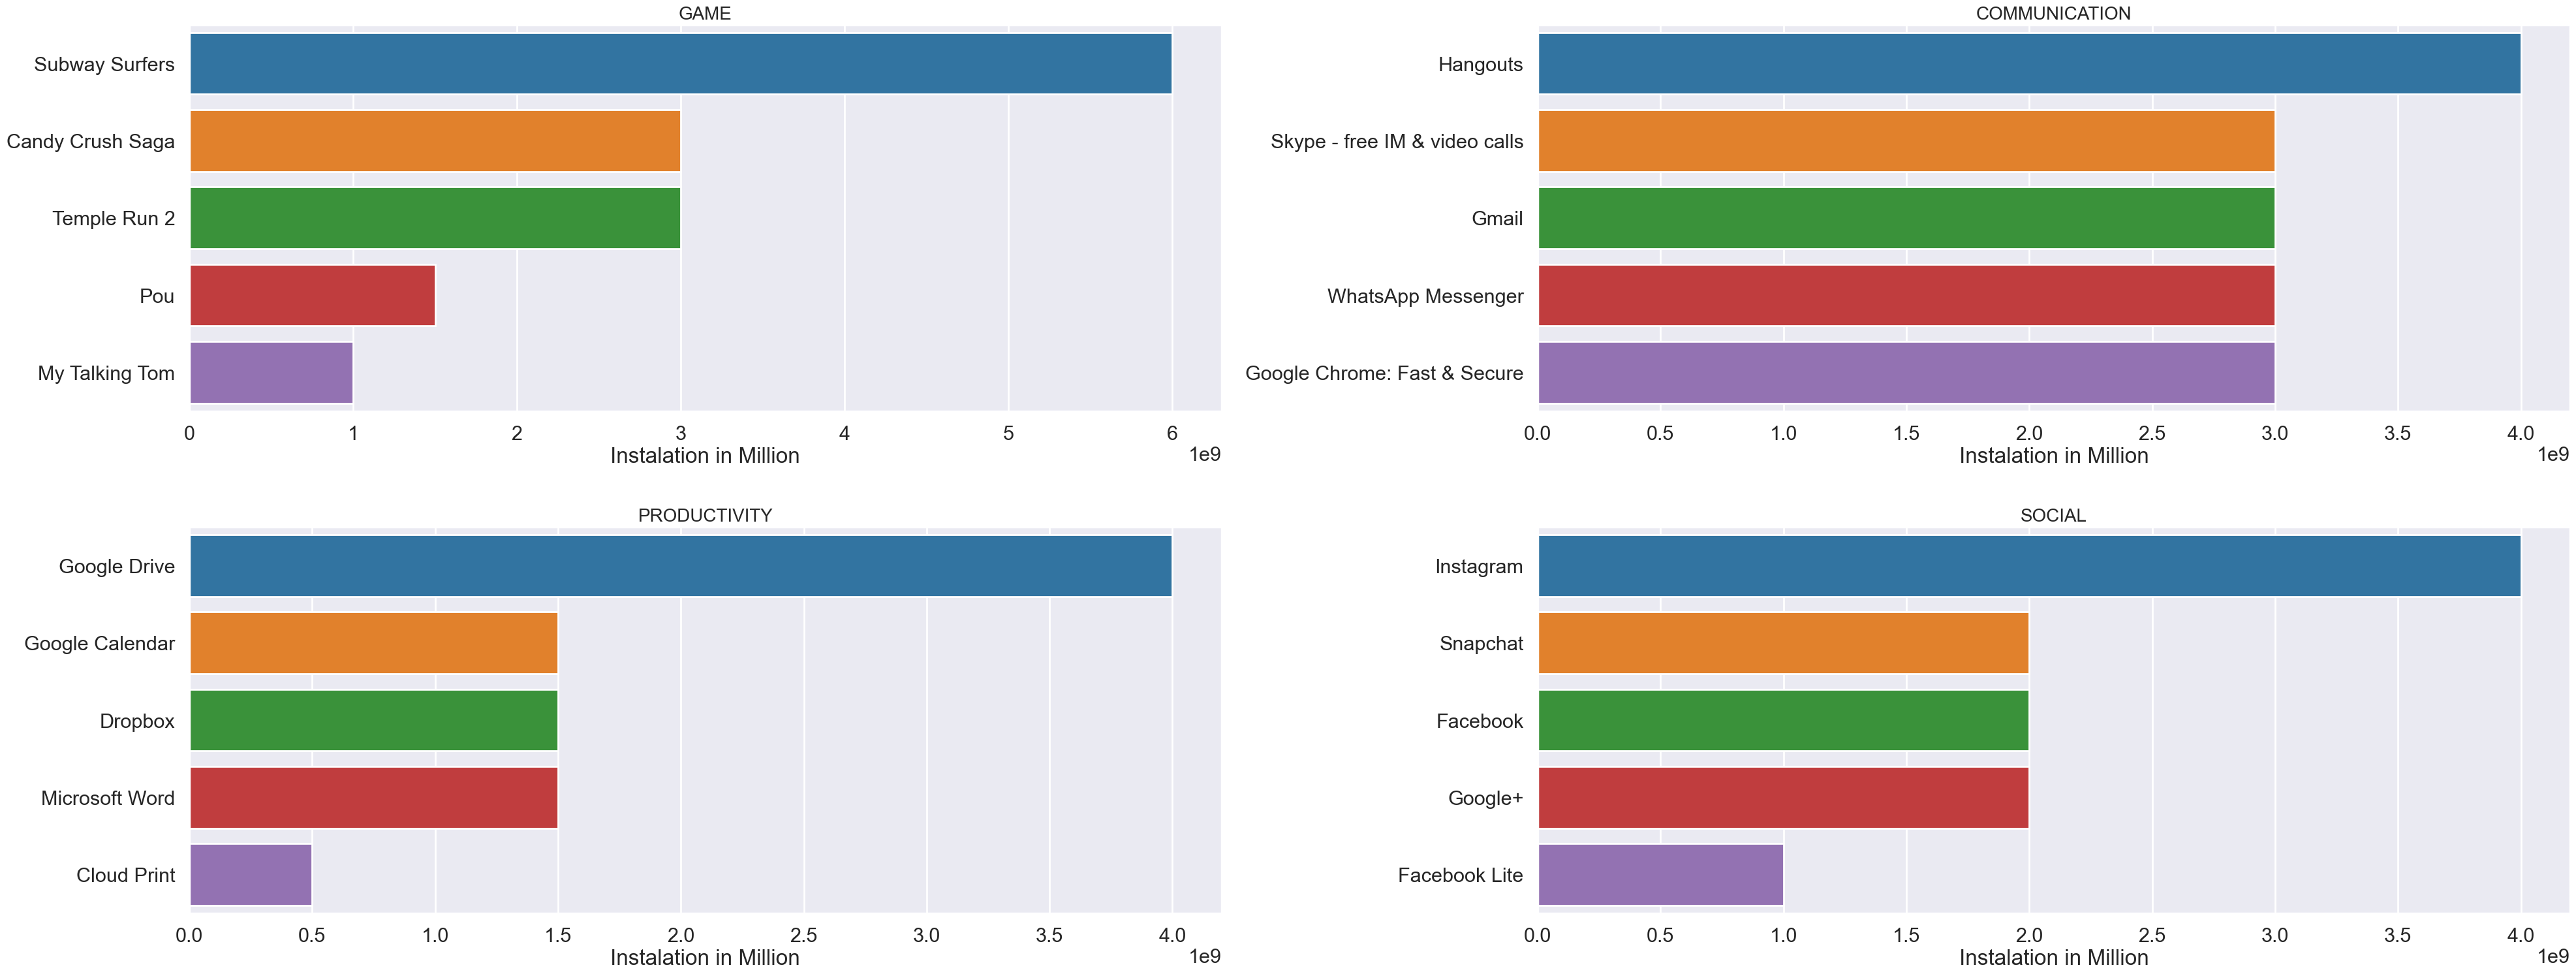

In [46]:
apps = ["GAME", "COMMUNICATION", "PRODUCTIVITY", "SOCIAL"]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40, 30))

for i, app in enumerate(apps):
    df2 = df_top5[df_top5.Category == app]
    df3 = df2.head(5)
    plt.subplot(4, 2, i+1)
    sns.barplot(data=df3, x="Installs", y="App", palette="tab10")
    plt.xlabel("Instalation in Million")
    plt.ylabel("")
    plt.title(app, size=20)

plt.tight_layout()
plt.subplots_adjust(hspace=.3)
plt.show()

#### How many apps are there on Google Play Store Which get 5 rating?

In [53]:
rating = df.groupby("App")["Rating"].sum().sort_values(ascending=False).reset_index()

In [55]:
rating.head(30)

,App,Rating
0,ROBLOX,40.5
1,"CBS Sports App - Scores, News, Stats & Watch Live",34.4
2,Duolingo: Learn Languages Free,32.9
3,8 Ball Pool,31.5
4,Candy Crush Saga,30.8
5,ESPN,29.4
6,Bowmasters,28.2
7,Zombie Catchers,28.2
8,Sniper 3D Gun Shooter: Free Shooting Games - FPS,27.6
9,Subway Surfers,27.0
